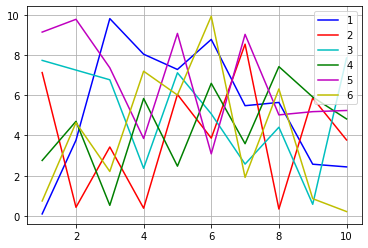

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = 'C:/Users\ghrms\PycharmProjects\project\data\sample'
file_list=os.listdir(path)


for i in file_list:
    df = pd.read_excel(os.path.join(path, i), header=None)
    data = np.array(df)
    xx = len(data[:,0])
    x = np.linspace(1,xx,xx)

    y1= data[:,0]
    y2= data[:,1]
    y3= data[:,2]
    y4= data[:,3]
    y5= data[:,4]
    y6= data[:,5]

    fig, ax1 = plt.subplots()
    line1 = ax1.plot(x, y1, color='b', label="1")
    line2 = ax1.plot(x, y2, color='r', label="2")
    line3 = ax1.plot(x, y3, color='c', label="3")
    line4 = ax1.plot(x, y4, color='g', label="4")
    line5 = ax1.plot(x, y5, color='m', label="5")
    line6 = ax1.plot(x, y6, color='y', label="6")

    lines = line1 + line2 + line3 +line4 +line5 + line6
    labels = [l.get_label() for l in lines]
    # plt.xlim(-0.1, 1.2)
    plt.grid()
    plt.legend(lines, labels, loc=0)
    plt.savefig('example/'+i.split('.')[0]+'.png',dpi=1000)

In [ ]:
"""K값으로 ML-Stress effective 구하기!!"""

import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('data\distance_angle\input_distance.xlsx')
im =np.array(cv2.imread('data/distance_angle/ff000057.jpg', cv2.IMREAD_GRAYSCALE ))/255



crack_tip_loaction = np.array([[207,614]])
data = np.array(read)
ratio = 2/70*0.001 #70픽셀당 2mm , mm to m

distance=[]
Ml_intencity=[]
stress = []
K= []


for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])




In [ ]:
"""K값으로 ML-Stress effective 구하기!!"""

import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('data\distance_angle\input_distance.xlsx')
im =np.array(cv2.imread('data/distance_angle/ff000057.jpg', cv2.IMREAD_GRAYSCALE ))/255



crack_tip_loaction = np.array([[207,614]])
data = np.array(read)
ratio = 2/70*0.001 #70픽셀당 2mm , mm to m

distance=[]
Ml_intencity=[]
stress = []
K= []


for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])




In [1]:
"""K값으로 ML-Stress effective 구하기!!"""

import cv2
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd
import matplotlib.pyplot as plt
import fracture

read = pd.read_excel('data\distance_angle\input_distance.xlsx')
im =np.array(cv2.imread('data/distance_angle/ff000057.jpg', cv2.IMREAD_GRAYSCALE ))/255



crack_tip_loaction = np.array([[207,614]])
data = np.array(read)
ratio = 2/70*0.001 #70픽셀당 2mm , mm to m

distance=[]
Ml_intencity=[]
stress = []
K= []


for i in data:
    theta=i[4]
    calculater_location = np.array([[i[2],i[3]]])
    distance_value = cdist(calculater_location, crack_tip_loaction)*ratio
    distance = np.append(distance, distance_value)
    value = np.average(im[int(i[2]):int(i[2]+2),int(i[3]):int(i[3])+2])

FileNotFoundError: [Errno 2] No such file or directory: 'data\\distance_angle\\input_distance.xlsx'

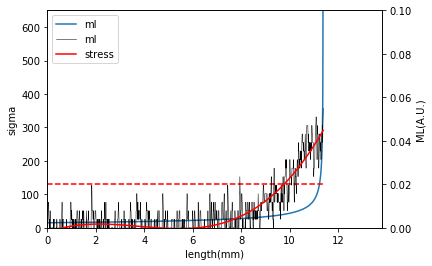

In [151]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot  as plt
from scipy import interpolate
import fracture

ratio = 2/278
im = cv.imread('C:/Users\ghrms\PycharmProjects\project\data\distance_angle/ff000056.jpg',cv.IMREAD_GRAYSCALE)/255-cv.imread('C:/Users\ghrms\PycharmProjects\project\data\distance_angle/ff000001.jpg',cv.IMREAD_GRAYSCALE)/255
y = im[524,:1582]
x = np.linspace(1, len(y),len(y))*ratio
tck = interpolate.splrep(x,y, s=1)

xnew = np.linspace(x.min(), x.max(), 300)
ynew = interpolate.splev(xnew,tck, der=0)


fig, ax = plt.subplots()
ax1 = ax.twinx()

y2=[fracture.K_sigma(128, 11.3813-i,0) for i in x]

line1 = ax.plot(x,y2, label='Stress')
ax.set_ylim(0, 650)
ax.set_xlim(0,1920*ratio)
line2 = ax1.plot(x,y,c ='black', linewidth='0.5', label = 'ML')
line3 = ax1.plot(xnew, ynew,c='red', label = 'ML')
# plt.axvline(x=, ymin=0, ymax=1)
ax1.hlines(0.02,0,x[-1],colors='r',linestyles='--')
ax1.set_ylim(0,0.1)
# plt.xlim(0,len(y)*ratio)
ax.set_xlabel('length(mm)')
ax.set_ylabel('sigma')
ax1.set_ylabel('ML(A.U.)')
# plt.ylabel('ML')
lines = line1 + line2 + line3
labels = ['ml','ml','stress']
ax.legend(lines , labels, loc=0)
plt.savefig('C:/Users\ghrms\PycharmProjects\project\연습용/그래프.png',dpi=500,
            transparent=True)
plt.show()

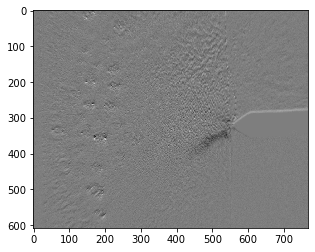

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.misc

im = cv2.imread('C:/Users\ghrms\PycharmProjects\project\just practice/2020090sample/ff000001.jpg',cv2.IMREAD_GRAYSCALE)/255\
     -cv2.imread('C:/Users\ghrms\PycharmProjects\project\just practice/2020090sample/ff002185.jpg',cv2.IMREAD_GRAYSCALE)/255

plt.imshow(im,cmap='gray')